# Red Wine Quality - Exploratory Data Analysis

## <font color="blue">Import Data and Packages</font>

In [1]:
# Import packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read csv files
df = pd.read_csv('winequality-red.csv')

## <font color='blue'>Check type and missing values</font>

In [3]:
#Gets information on dataframe
#There are 1599 records with 12 attributes.
#Quality is an integer, and all others are floats
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
#Check for missing values
#There are none
df.isnull() .sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## <font color='blue'>Summary Statistics and Distributions</font>

In [5]:
#Generate summary statistics using describe function
df_stat = df.describe().drop(["count"]).round(3)
df_stat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
mean,8.320,0.528,0.271,2.539,0.087,15.875,46.468,0.997,3.311,0.658,10.423,5.636
std,1.741,0.179,0.195,1.410,0.047,10.460,32.895,0.002,0.154,0.170,1.066,0.808
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000
25%,7.100,0.390,0.090,1.900,0.070,7.000,22.000,0.996,3.210,0.550,9.500,5.000
50%,7.900,0.520,0.260,2.200,0.079,14.000,38.000,0.997,3.310,0.620,10.200,6.000
75%,9.200,0.640,0.420,2.600,0.090,21.000,62.000,0.998,3.400,0.730,11.100,6.000
max,15.900,1.580,1.000,15.500,0.611,72.000,289.000,1.004,4.010,2.000,14.900,8.000


In [6]:
#Generate .csv file to add to report
df_stat.to_csv('Red_Summary_Stats.csv')

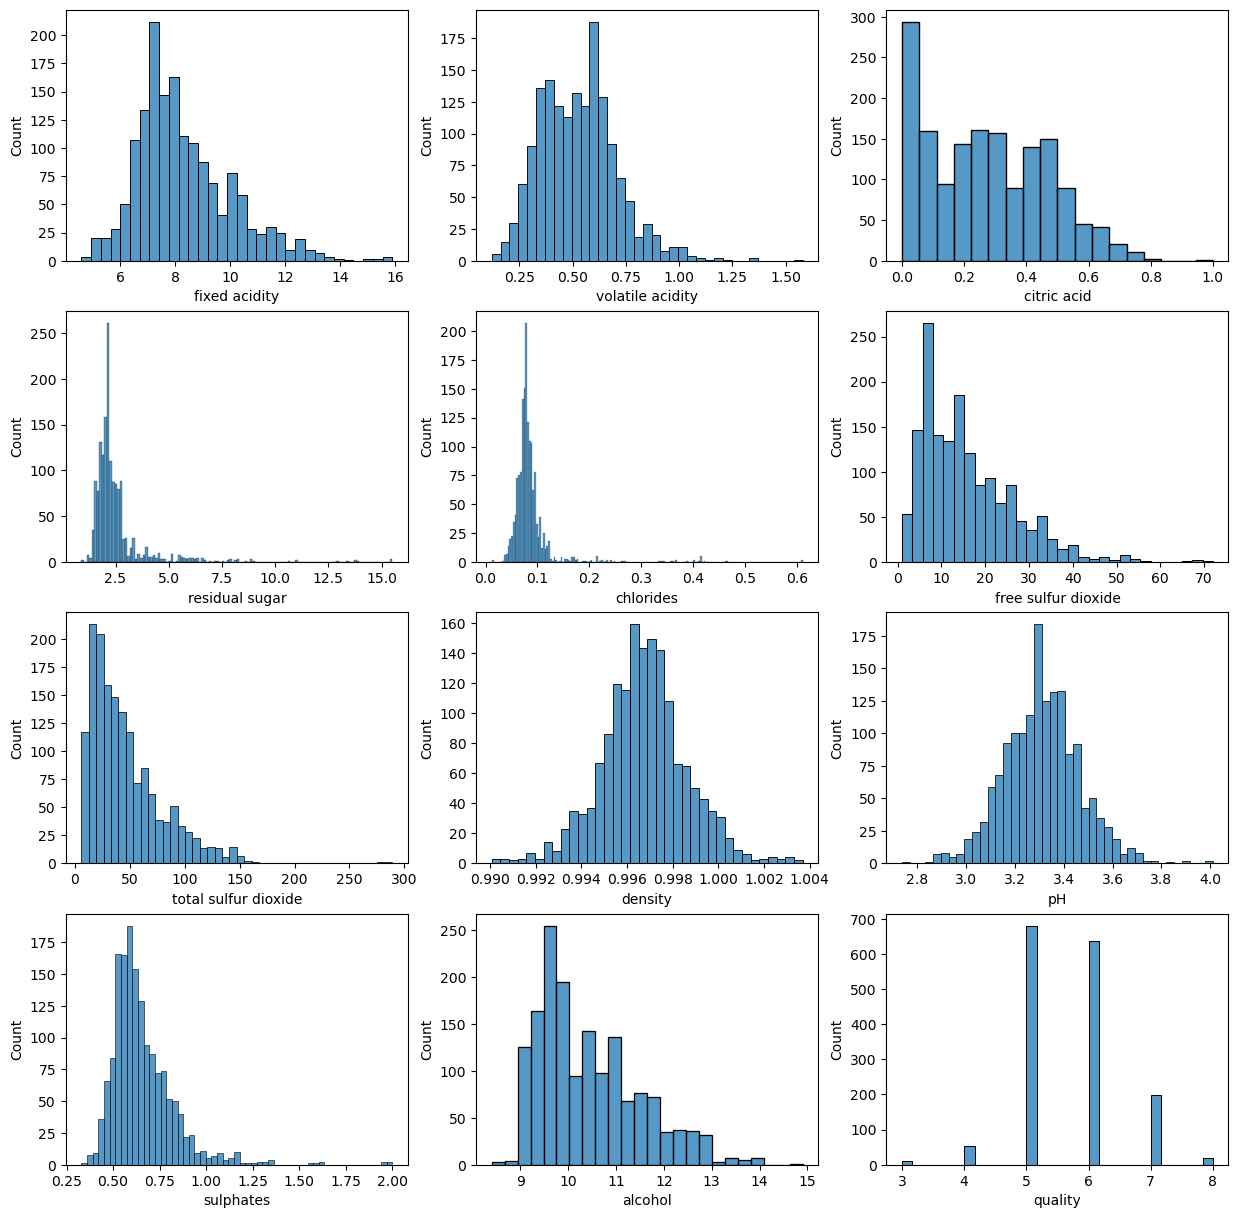

In [7]:
#Generate histograms to observe distributions
fig, axes = plt.subplots(nrows = 4, ncols = 3)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(15, 15)

for ax, col in zip(axes, df.columns):
  sns.histplot(df[col], ax = ax)

#Save figure to add to report
plt.savefig('Variable_Distributions.jpeg')

## <font color='blue'>Determine Correlation</font>

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


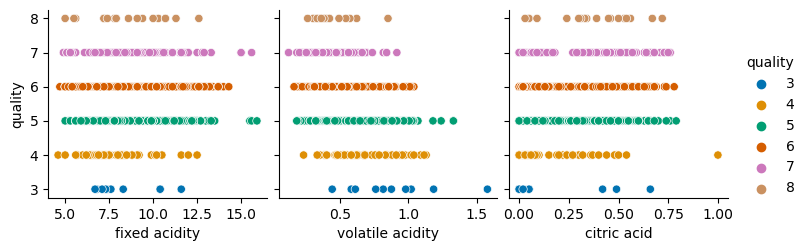

In [8]:
#Create pair plots and save figures to add to report
p1 = sns.pairplot(df, hue='quality', palette='colorblind',
             x_vars=('fixed acidity', 'volatile acidity', 'citric acid'),
             y_vars='quality')
plt.savefig('Pair_Plot1')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


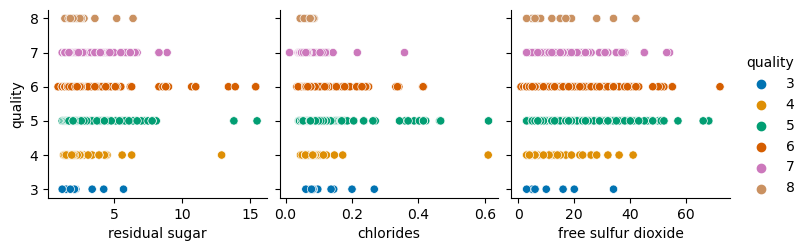

In [9]:
p2 = sns.pairplot(df, hue='quality', palette='colorblind',
             x_vars=('residual sugar', 'chlorides', 'free sulfur dioxide'),
             y_vars='quality')
plt.savefig('Pair_Plot2')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


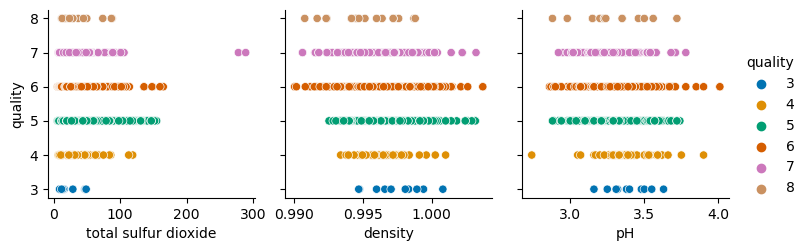

In [10]:
p3 = sns.pairplot(df, hue='quality', palette='colorblind',
             x_vars=('total sulfur dioxide', 'density', 'pH'),
             y_vars='quality')
plt.savefig('Pair_Plot3')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


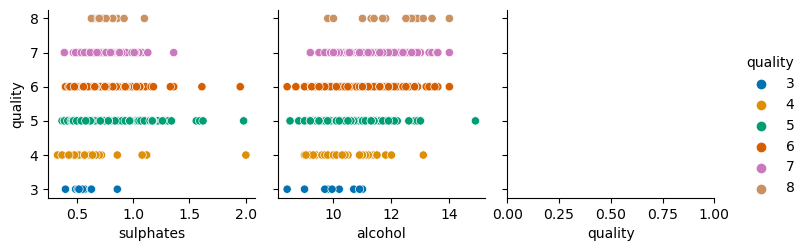

In [11]:
p4 = sns.pairplot(df, hue='quality', palette='colorblind',
             x_vars=('sulphates', 'alcohol', 'quality'),
             y_vars='quality')
plt.savefig('Pair_Plot4')

In [12]:
#Create correlation table and save as .csv
corr = df.corrwith(df['quality']).round(2)
print(corr)
corr.to_csv('Quality_Correlation.csv')

fixed acidity           0.12
volatile acidity       -0.39
citric acid             0.23
residual sugar          0.01
chlorides              -0.13
free sulfur dioxide    -0.05
total sulfur dioxide   -0.19
density                -0.17
pH                     -0.06
sulphates               0.25
alcohol                 0.48
quality                 1.00
dtype: float64
